In [105]:
import xgboost as xgb
from xgboost import plot_importance

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    
    accuracy = accuracy_score(y_test , pred)
    
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('./titanic/titanic_train.csv')
predict_df = pd.read_csv('./titanic/test.csv')
gender_submission_df = pd.read_csv('./titanic/gender_submission.csv')

# 알파벳 뒤에 붙는 숫자 값은 무시하고 Alphabet만 가져오는 전략을 선택
train_df['Cabin'] = train_df['Cabin'].str[:1]

def get_category_age(age):
    cat = ''
    if age <= -1: cat = 0
    elif age <= 5: cat = 1
    elif age <= 12: cat = 2
    elif age <= 18: cat = 3
    elif age <= 25: cat = 4
    elif age <= 35: cat = 5
    elif age <= 60: cat = 6
    else: cat = 7
               
    return cat

group_names = [0, 1, 2, 3, 4, 5, 6, 7]
train_df['Age_range'] = train_df['Age'].apply(lambda x : get_category_age(x))

def get_category_fare(fare):
    cat = ''
    if fare <= 0: cat = 0
    elif fare <= 10: cat = 1
    elif fare <= 20: cat = 2
    elif fare <= 30: cat = 3
    elif fare <= 40: cat = 4
    elif fare <= 50: cat = 5
    elif fare <= 60: cat = 6
    else: cat = 7
               
    return cat

group_names = [0, 1, 2, 3, 4, 5, 6, 7]
train_df['Fare_range'] = train_df['Fare'].apply(lambda x : get_category_fare(x))

# 불필요한 특성, null 값 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket', 'Age', 'Fare'], axis=1, inplace=True)

    y = df['Survived']
    df = df.drop('Survived', axis=1, inplace=False)
    return df, y

def fillna(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    return df
# predict_df에서 사용
def drop_features_update(df):
    df.drop(['PassengerId','Name','Ticket', 'Age', 'Fare'], axis=1, inplace=True)
    return df

train_df = fillna(train_df)
X, y = drop_features(train_df)


# 라벨 인코딩 구현
# Sex
def get_category_sex(sex):
    cat = ''
    if sex == "male": cat = 0
    else: cat = 1
    return cat

group_names = [0, 1]
X['Sex'] = X['Sex'].apply(lambda x : get_category_sex(x))

# Embarked
def get_category_embarked(embarked):
    cat = ''
    if embarked == "S": cat = 0
    elif embarked == "C": cat= 1
    elif embarked == "Q": cat= 2
    else: cat = 3
    return cat

group_names = [0, 1, 2, 3]
X['Embarked'] = X['Embarked'].apply(lambda x : get_category_embarked(x))

# Cabin
def get_category_cabin(cabin):
    cat = ''
    if cabin == "A": cat = 0
    elif cabin == "B": cat= 1
    elif cabin == "C": cat= 2
    elif cabin == "D": cat= 3
    elif cabin == "E": cat= 4
    elif cabin == "F": cat= 5
    elif cabin == "G": cat= 6
    elif cabin == "N": cat= 7
    else: cat = 8
    return cat

group_names = [0, 1, 2, 3, 4, 5, 6, 7, 8]
X['Cabin'] = X['Cabin'].apply(lambda x : get_category_cabin(x))

print(X.head())

from sklearn.preprocessing import StandardScaler

# # 표준화 => 2차원 데이터
# sc = StandardScaler()
# X = sc.fit_transform(X)
# X[1]

   Pclass  Sex  SibSp  Parch  Cabin  Embarked  Age_range  Fare_range
0       3    0      1      0      7         0          4           1
1       1    1      1      0      2         1          6           7
2       3    1      0      0      7         0          5           1
3       1    1      1      0      2         0          5           6
4       3    0      0      0      7         0          5           1


In [108]:
predict_df['Age_range'] = predict_df['Age'].apply(lambda x : get_category_age(x))

predict_df['Fare_range'] = predict_df['Fare'].apply(lambda x : get_category_fare(x))

predict_df = fillna(predict_df)
predict_df = drop_features_update(predict_df)

predict_df['Sex'] = predict_df['Sex'].apply(lambda x : get_category_sex(x))
predict_df['Embarked'] = predict_df['Embarked'].apply(lambda x : get_category_embarked(x))

predict_df['Cabin'] = predict_df['Cabin'].str[:1]
predict_df['Cabin'] = predict_df['Cabin'].apply(lambda x : get_category_cabin(x))

print(predict_df.head(3))

# predict_df = sc.transform(predict_df)
# predict_df[1]

   Pclass  Sex  SibSp  Parch  Cabin  Embarked  Age_range  Fare_range
0       3    0      0      0      7         2          5           1
1       3    1      1      0      7         0          6           1
2       2    0      0      0      7         2          7           1


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리 
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

> - 뛰어난 성능과 효율성으로 인해 최근 가장 널리 사용되는 강력한 머신러닝 알고리즘 중 하나
> - XGBoost는 gradient boosting 알고리즘을 확장한 것입니다. 이는 약한 학습기(weak learner)들을 순차적으로 학습시켜 강한 예측기(strong predictor)를 만드는 ensemble 방식
> - 성능향상
> - 병렬 처리: 트리 구축 과정을 병렬화하여 학습 속도를 높였습니다.
정규화: 과적합을 방지하기 위해 L1, L2 정규화를 적용했습니다.
누락값 처리: 누락값을 자동으로 처리할 수 있습니다.
가중치 정규화: 트리의 복잡도를 제어하여 과적합을 방지합니다.

> - 장점
> - 뛰어난 성능: 다양한 문제에서 최고의 성능을 보여줍니다.
빠른 학습 속도: 병렳 처리와 최적화된 구현으로 빠른 학습이 가능합니다.
다양한 데이터 유형 지원: 숫자형, 범주형, 결측값 등 다양한 데이터를 처리할 수 있습니다.
높은 확장성: 대용량 데이터에도 잘 작동합니다.

> - 하이퍼파라미터
> - max_depth: 개별 트리의 최대 깊이
n_estimators: 생성할 트리의 개수
learning_rate: 각 트리의 기여도를 조절하는 학습률
gamma: 노드 분할에 필요한 최소 손실 감소량
reg_alpha, reg_lambda: L1, L2 정규화 계수

In [33]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환. 
# 학습, 검증, 테스트용 DMatrix를 생성. 
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

params = { 'max_depth':3,
           'eta': 0.05, # learning-rate
           'objective':'binary:logistic', #iteration, 목적함수(objective)는 binary:logistic(이진 로지스틱)
           'eval_metric':'logloss'
        }
num_rounds = 400 # n_estermators, 생성할 weak learner의 수


# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다. 
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방. 

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds, \
                      early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65423	eval-logloss:0.57225
[1]	train-logloss:0.63510	eval-logloss:0.55531
[2]	train-logloss:0.61775	eval-logloss:0.53974
[3]	train-logloss:0.60199	eval-logloss:0.52552
[4]	train-logloss:0.58761	eval-logloss:0.51312
[5]	train-logloss:0.57446	eval-logloss:0.50100
[6]	train-logloss:0.56242	eval-logloss:0.48986
[7]	train-logloss:0.55137	eval-logloss:0.48019
[8]	train-logloss:0.54121	eval-logloss:0.47065
[9]	train-logloss:0.53186	eval-logloss:0.46176
[10]	train-logloss:0.52325	eval-logloss:0.45382
[11]	train-logloss:0.51529	eval-logloss:0.44619
[12]	train-logloss:0.50795	eval-logloss:0.43910
[13]	train-logloss:0.50116	eval-logloss:0.43250
[14]	train-logloss:0.49487	eval-logloss:0.42659
[15]	train-logloss:0.48906	eval-logloss:0.42081
[16]	train-logloss:0.48377	eval-logloss:0.41552
[17]	train-logloss:0.47875	eval-logloss:0.41071
[18]	train-logloss:0.47403	eval-logloss:0.40696
[19]	train-logloss:0.46976	eval-logloss:0.40281
[20]	train-logloss:0.46563	eval-logloss:0.40023
[2

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.159 0.075 0.067 0.955 0.551 0.155 0.92  0.936 0.402 0.79 ] 

예측값 10개만 표시: [0, 0, 0, 1, 1, 0, 1, 1, 0, 1] 

오차 행렬
[[97 13]
 [20 49]]
정확도: 0.8156, 정밀도: 0.7903, 재현율: 0.7101,    F1: 0.7481, AUC:0.8889




<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

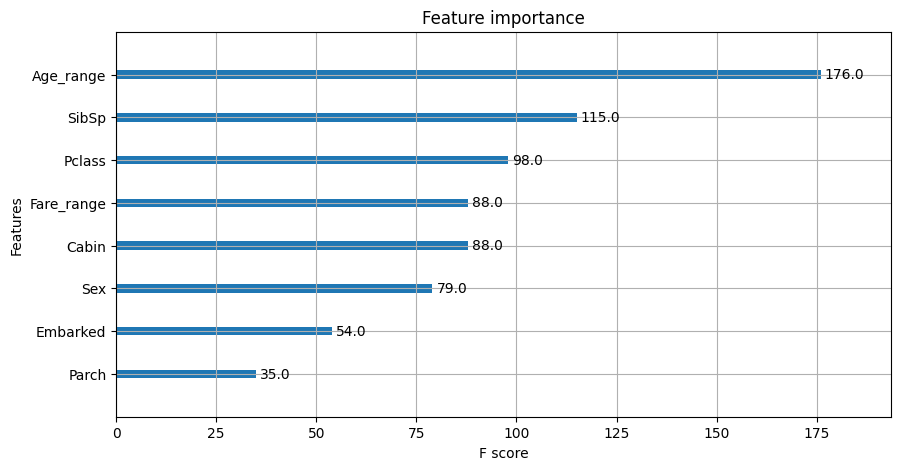

In [39]:
# predict()를 통해 예측 확률값을 반환하고 예측 값으로 변환
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3), "\n")

# 예측 확률이 0.5 보다 크면 1, 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10], "\n")

get_clf_eval(y_test , preds, pred_probs)
print("\n")

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_model, ax=ax) # ax가 그림을 그린다.

In [45]:
dpredict = xgb.DMatrix(data=predict_df)

predict_titanic_pred_xgb = xgb_model.predict(dpredict)
preds_xgb = [ 1 if x > 0.5 else 0 for x in predict_titanic_pred_xgb]
print(f"predict_titanic_Voting 예측: {predict_titanic_pred_xgb[:10]}")
print('예측값 10개만 표시:',preds_xgb[:10], "\n")

gender_submission_df['Survived'] = preds_xgb
gender_submission_df.to_csv('titanic_submission_xgb.csv',index=False)
gender_submission_df

predict_titanic_Voting 예측: [0.21176656 0.55627114 0.107283   0.19013669 0.3735853  0.13017876
 0.85130155 0.15791108 0.7982232  0.08893801]
예측값 10개만 표시: [0, 1, 0, 0, 0, 0, 1, 0, 1, 0] 



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


오차 행렬
[[101   9]
 [ 21  48]]
정확도: 0.8324, 정밀도: 0.8421, 재현율: 0.6957,    F1: 0.7619, AUC:0.8886


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

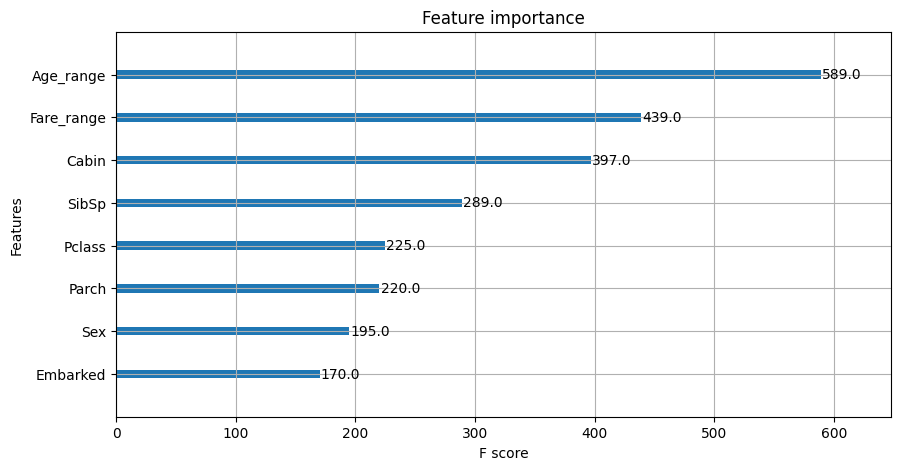

In [67]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력. 미 입력해도 수행에 문제 없음.   
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , w_preds, w_pred_proba)

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_wrapper, ax=ax)

In [69]:
predict_titanic_pred_xgb_python = xgb_wrapper.predict(predict_df)
preds_xgb_python = [ 1 if x > 0.5 else 0 for x in predict_titanic_pred_xgb_python]
print(f"predict_titanic_Voting 예측: {predict_titanic_pred_xgb_python[:10]}")
print('예측값 10개만 표시:',preds_xgb_python[:10], "\n")

gender_submission_df['Survived'] = preds_xgb_python
gender_submission_df.to_csv('titanic_submission_xgb_python.csv',index=False)
gender_submission_df

predict_titanic_Voting 예측: [0 0 0 0 0 0 1 0 1 0]
예측값 10개만 표시: [0, 0, 0, 0, 0, 0, 1, 0, 1, 0] 



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### early stopping을 50으로 설정하고 재 학습/예측/평가
> - tr, val 나눠서 실행

[0]	validation_0-logloss:0.65423	validation_1-logloss:0.57225
[1]	validation_0-logloss:0.63510	validation_1-logloss:0.55531
[2]	validation_0-logloss:0.61775	validation_1-logloss:0.53974
[3]	validation_0-logloss:0.60199	validation_1-logloss:0.52552
[4]	validation_0-logloss:0.58761	validation_1-logloss:0.51312
[5]	validation_0-logloss:0.57446	validation_1-logloss:0.50100
[6]	validation_0-logloss:0.56242	validation_1-logloss:0.48986
[7]	validation_0-logloss:0.55137	validation_1-logloss:0.48019
[8]	validation_0-logloss:0.54121	validation_1-logloss:0.47065
[9]	validation_0-logloss:0.53186	validation_1-logloss:0.46176
[10]	validation_0-logloss:0.52325	validation_1-logloss:0.45382
[11]	validation_0-logloss:0.51529	validation_1-logloss:0.44619
[12]	validation_0-logloss:0.50795	validation_1-logloss:0.43910
[13]	validation_0-logloss:0.50116	validation_1-logloss:0.43250
[14]	validation_0-logloss:0.49487	validation_1-logloss:0.42659
[15]	validation_0-logloss:0.48906	validation_1-logloss:0.42081
[1

/opt/homebrew/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

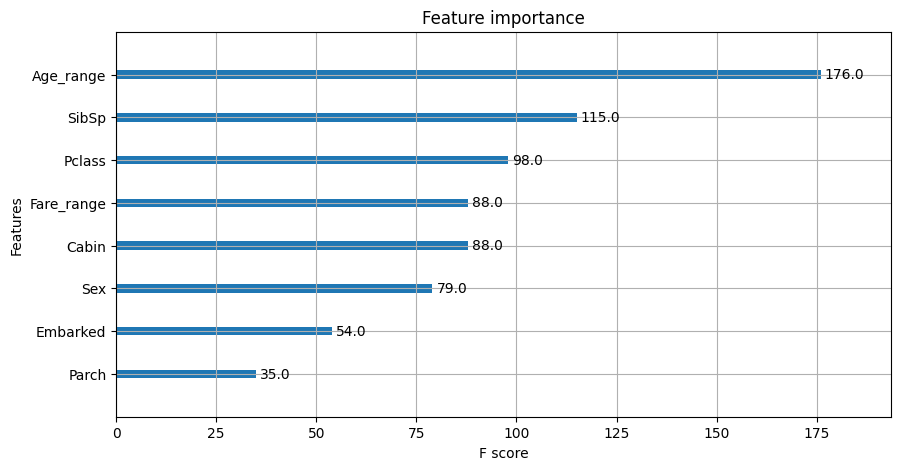

In [70]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , ws50_preds, ws50_pred_proba)

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_wrapper, ax=ax)

In [71]:
predict_titanic_pred_xgb_python_ealy = xgb_wrapper.predict(predict_df)
preds_xgb_python_ealy = [ 1 if x > 0.5 else 0 for x in predict_titanic_pred_xgb_python_ealy]
print(f"predict_titanic_Voting 예측: {predict_titanic_pred_xgb_python_ealy[:10]}")
print('예측값 10개만 표시:',preds_xgb_python_ealy[:10], "\n")

gender_submission_df['Survived'] = preds_xgb_python_ealy
gender_submission_df.to_csv('titanic_submission_xgb_python_ealy.csv',index=False)
gender_submission_df

predict_titanic_Voting 예측: [0 1 0 0 0 0 1 0 1 0]
예측값 10개만 표시: [0, 1, 0, 0, 0, 0, 1, 0, 1, 0] 



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


[0]	validation_0-logloss:0.65423	validation_1-logloss:0.57225
[1]	validation_0-logloss:0.63510	validation_1-logloss:0.55531
[2]	validation_0-logloss:0.61775	validation_1-logloss:0.53974
[3]	validation_0-logloss:0.60199	validation_1-logloss:0.52552
[4]	validation_0-logloss:0.58761	validation_1-logloss:0.51312
[5]	validation_0-logloss:0.57446	validation_1-logloss:0.50100
[6]	validation_0-logloss:0.56242	validation_1-logloss:0.48986
[7]	validation_0-logloss:0.55137	validation_1-logloss:0.48019
[8]	validation_0-logloss:0.54121	validation_1-logloss:0.47065
[9]	validation_0-logloss:0.53186	validation_1-logloss:0.46176
[10]	validation_0-logloss:0.52325	validation_1-logloss:0.45382
[11]	validation_0-logloss:0.51529	validation_1-logloss:0.44619
[12]	validation_0-logloss:0.50795	validation_1-logloss:0.43910
[13]	validation_0-logloss:0.50116	validation_1-logloss:0.43250
[14]	validation_0-logloss:0.49487	validation_1-logloss:0.42659
[15]	validation_0-logloss:0.48906	validation_1-logloss:0.42081
[1

/opt/homebrew/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

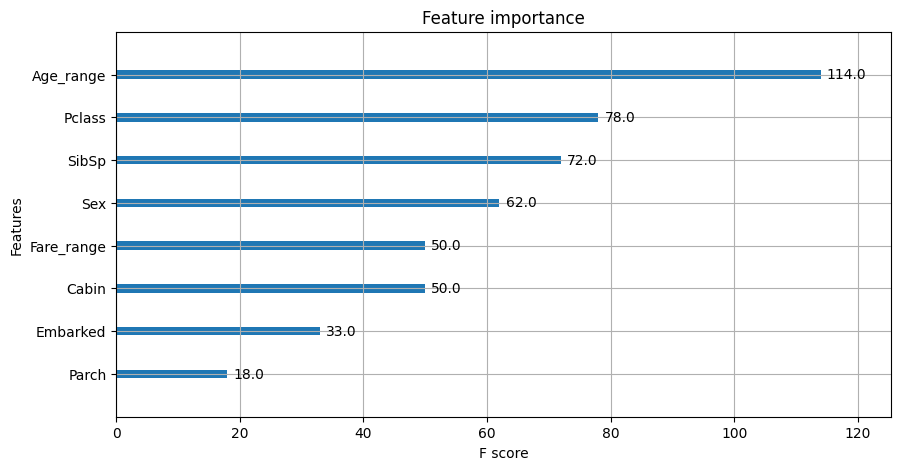

In [59]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_wrapper, ax=ax)

[0]	validation_0-logloss:0.65423	validation_1-logloss:0.57225
[1]	validation_0-logloss:0.63510	validation_1-logloss:0.55531
[2]	validation_0-logloss:0.61775	validation_1-logloss:0.53974
[3]	validation_0-logloss:0.60199	validation_1-logloss:0.52552
[4]	validation_0-logloss:0.58761	validation_1-logloss:0.51312
[5]	validation_0-logloss:0.57446	validation_1-logloss:0.50100
[6]	validation_0-logloss:0.56242	validation_1-logloss:0.48986
[7]	validation_0-logloss:0.55137	validation_1-logloss:0.48019
[8]	validation_0-logloss:0.54121	validation_1-logloss:0.47065
[9]	validation_0-logloss:0.53186	validation_1-logloss:0.46176
[10]	validation_0-logloss:0.52325	validation_1-logloss:0.45382
[11]	validation_0-logloss:0.51529	validation_1-logloss:0.44619
[12]	validation_0-logloss:0.50795	validation_1-logloss:0.43910
[13]	validation_0-logloss:0.50116	validation_1-logloss:0.43250
[14]	validation_0-logloss:0.49487	validation_1-logloss:0.42659
[15]	validation_0-logloss:0.48906	validation_1-logloss:0.42081
[1

/opt/homebrew/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[71]	validation_0-logloss:0.39389	validation_1-logloss:0.36831
[72]	validation_0-logloss:0.39343	validation_1-logloss:0.36817
[73]	validation_0-logloss:0.39303	validation_1-logloss:0.36852
[74]	validation_0-logloss:0.39250	validation_1-logloss:0.36805
[75]	validation_0-logloss:0.39181	validation_1-logloss:0.36862
[76]	validation_0-logloss:0.39141	validation_1-logloss:0.36852
[77]	validation_0-logloss:0.39092	validation_1-logloss:0.36810
[78]	validation_0-logloss:0.39055	validation_1-logloss:0.36801
[79]	validation_0-logloss:0.39006	validation_1-logloss:0.36950
[80]	validation_0-logloss:0.38971	validation_1-logloss:0.36917
[81]	validation_0-logloss:0.38872	validation_1-logloss:0.37019
[82]	validation_0-logloss:0.38826	validation_1-logloss:0.37093
[83]	validation_0-logloss:0.38796	validation_1-logloss:0.37118
[84]	validation_0-logloss:0.38742	validation_1-logloss:0.37166
[85]	validation_0-logloss:0.38698	validation_1-logloss:0.37129
[86]	validation_0-logloss:0.38668	validation_1-logloss:

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

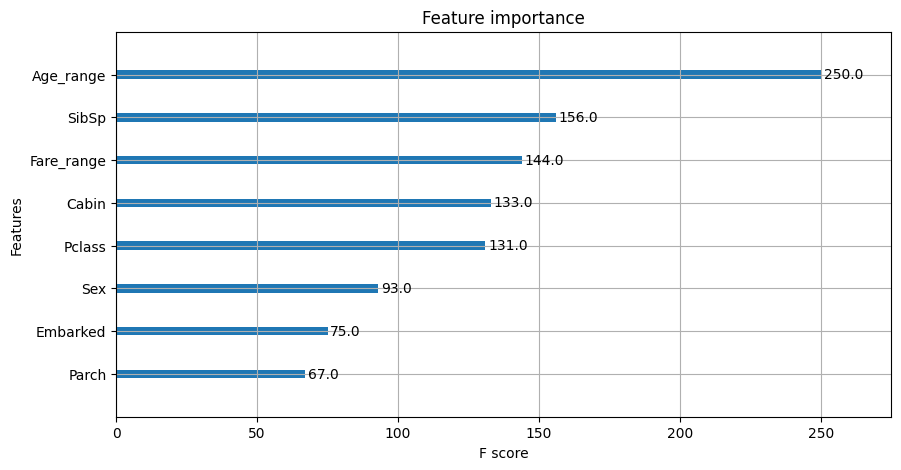

In [56]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_wrapper, ax=ax)

# HyperOpt

In [111]:
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, early_stopping_rounds=100, eval_metric='logloss')

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
# 다중 분류 문제에서는 'multi_logloss'가 적합 / 회귀 문제에서는 'rmse', 'mae', 'mse' 등이 주로 사용
xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])
y_pred = xgb_clf.predict(X_test)

# 오차 행렬
cm = confusion_matrix(y_test, y_pred)
print(cm)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-logloss:0.65163	validation_1-logloss:0.57158
[1]	validation_0-logloss:0.63006	validation_1-logloss:0.55456
[2]	validation_0-logloss:0.61046	validation_1-logloss:0.53908
[3]	validation_0-logloss:0.59258	validation_1-logloss:0.52499
[4]	validation_0-logloss:0.57624	validation_1-logloss:0.51214
[5]	validation_0-logloss:0.56125	validation_1-logloss:0.50039
[6]	validation_0-logloss:0.54749	validation_1-logloss:0.48966
[7]	validation_0-logloss:0.53482	validation_1-logloss:0.47981
[8]	validation_0-logloss:0.52322	validation_1-logloss:0.47182
[9]	validation_0-logloss:0.51245	validation_1-logloss:0.46364
[10]	validation_0-logloss:0.50240	validation_1-logloss:0.45749
[11]	validation_0-logloss:0.49310	validation_1-logloss:0.45064
[12]	validation_0-logloss:0.48445	validation_1-logloss:0.44546
[13]	validation_0-logloss:0.47636	validation_1-logloss:0.44058
[14]	validation_0-logloss:0.46889	validation_1-logloss:0.43637
[15]	validation_0-logloss:0.46186	validation_1-logloss:0.43136
[1

In [112]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 
# hp.uniform 균일 분포(Uniform Distribution)에서 하이퍼파라미터 값을 샘플링
# 균일 분포란 특정 구간 내에서 모든 값이 동일한 확률을 가지는 확률 분포를 말합니다. 즉, 어떤 값이 선택될 확률이 균일하게 분포되어 있다.
# [0.5, 0.95] 구간 내에서 균일하게 분포된 값을 'colsample_bytree' 하이퍼파라미터에 대한 후보 값으로 샘플링 = 0.5와 0.95 사이의 값들을 후보로 고려
xgb_search_space = {'max_depth': hp.quniform('max_depth', 2, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [114]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100,
                            max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'],
                            early_stopping_rounds=30,
                            eval_metric='logloss')
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 5개 k-fold방식 적용 
    kf = KFold(n_splits=5)
    
    # X_train을 다시 학습과 검증용 데이터로 분리
    # X_train 데이터에 대한 학습 인덱스(tr_index)와 검증 인덱스(val_index)를 얻는다.
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 5개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials,
            rstate=np.random.default_rng()
           )

print('best:', best)

[0]	validation_0-logloss:0.64399	validation_1-logloss:0.64181                   
[1]	validation_0-logloss:0.63248	validation_1-logloss:0.63518                   
[2]	validation_0-logloss:0.61080	validation_1-logloss:0.61899                   
[3]	validation_0-logloss:0.60185	validation_1-logloss:0.61408                   
[4]	validation_0-logloss:0.59323	validation_1-logloss:0.60958                   
[5]	validation_0-logloss:0.58469	validation_1-logloss:0.60376                   
[6]	validation_0-logloss:0.57625	validation_1-logloss:0.59884                   
[7]	validation_0-logloss:0.56854	validation_1-logloss:0.59482                   
[8]	validation_0-logloss:0.56146	validation_1-logloss:0.59015                   
[9]	validation_0-logloss:0.54474	validation_1-logloss:0.57665                   
[10]	validation_0-logloss:0.53119	validation_1-logloss:0.56702                  
[11]	validation_0-logloss:0.52598	validation_1-logloss:0.56381                  
[12]	validation_0-logloss:0.

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[62]	validation_0-logloss:0.36842	validation_1-logloss:0.42116                  
[63]	validation_0-logloss:0.36804	validation_1-logloss:0.42114                  
[64]	validation_0-logloss:0.36782	validation_1-logloss:0.42185                  
[65]	validation_0-logloss:0.36706	validation_1-logloss:0.42188                  
[66]	validation_0-logloss:0.36610	validation_1-logloss:0.42381                  
[67]	validation_0-logloss:0.36575	validation_1-logloss:0.42393                  
[68]	validation_0-logloss:0.36547	validation_1-logloss:0.42385                  
[69]	validation_0-logloss:0.36442	validation_1-logloss:0.42406                  
[70]	validation_0-logloss:0.36419	validation_1-logloss:0.42475                  
[71]	validation_0-logloss:0.36394	validation_1-logloss:0.42467                  
[72]	validation_0-logloss:0.36369	validation_1-logloss:0.42455                  
[73]	validation_0-logloss:0.36345	validation_1-logloss:0.42362                  
[74]	validation_0-logloss:0.

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[21]	validation_0-logloss:0.51365	validation_1-logloss:0.50667
[22]	validation_0-logloss:0.50752	validation_1-logloss:0.49983                  
[23]	validation_0-logloss:0.50206	validation_1-logloss:0.49418                  
[24]	validation_0-logloss:0.49978	validation_1-logloss:0.49230                  
[25]	validation_0-logloss:0.49802	validation_1-logloss:0.49117                  
[26]	validation_0-logloss:0.49242	validation_1-logloss:0.48554                  
[27]	validation_0-logloss:0.49025	validation_1-logloss:0.48527                  
[28]	validation_0-logloss:0.48596	validation_1-logloss:0.48108                  
[29]	validation_0-logloss:0.48397	validation_1-logloss:0.48075                  
[30]	validation_0-logloss:0.48207	validation_1-logloss:0.47932                  
[31]	validation_0-logloss:0.47802	validation_1-logloss:0.47538                  
[32]	validation_0-logloss:0.47396	validation_1-logloss:0.47190                  
[33]	validation_0-logloss:0.47219	validation_1

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[24]	validation_0-logloss:0.39353	validation_1-logloss:0.40266                  
[25]	validation_0-logloss:0.39199	validation_1-logloss:0.40182                  
[26]	validation_0-logloss:0.39020	validation_1-logloss:0.40173                  
[27]	validation_0-logloss:0.38875	validation_1-logloss:0.40313                  
[28]	validation_0-logloss:0.38765	validation_1-logloss:0.40292                  
[29]	validation_0-logloss:0.38609	validation_1-logloss:0.40331                  
[30]	validation_0-logloss:0.38482	validation_1-logloss:0.40284                  
[31]	validation_0-logloss:0.38349	validation_1-logloss:0.40189                  
[32]	validation_0-logloss:0.38249	validation_1-logloss:0.40244                  
[33]	validation_0-logloss:0.38163	validation_1-logloss:0.40201                  
[34]	validation_0-logloss:0.38075	validation_1-logloss:0.40288                  
[35]	validation_0-logloss:0.38008	validation_1-logloss:0.40160                  
[36]	validation_0-logloss:0.

In [96]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5) 
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.84274	validation_1-auc:0.81030
[1]	validation_0-auc:0.87215	validation_1-auc:0.79074
[2]	validation_0-auc:0.87881	validation_1-auc:0.82529
[3]	validation_0-auc:0.87731	validation_1-auc:0.82725
[4]	validation_0-auc:0.87392	validation_1-auc:0.83703
[5]	validation_0-auc:0.87391	validation_1-auc:0.82203
[6]	validation_0-auc:0.87640	validation_1-auc:0.78553
[7]	validation_0-auc:0.87739	validation_1-auc:0.76597
[8]	validation_0-auc:0.87585	validation_1-auc:0.75293
[9]	validation_0-auc:0.88868	validation_1-auc:0.75684
[10]	validation_0-auc:0.89293	validation_1-auc:0.75880
[11]	validation_0-auc:0.89169	validation_1-auc:0.75880
[12]	validation_0-auc:0.89606	validation_1-auc:0.76141
[13]	validation_0-auc:0.89683	validation_1-auc:0.75489
[14]	validation_0-auc:0.89631	validation_1-auc:0.75098
[15]	validation_0-auc:0.89865	validation_1-auc:0.75489
[16]	validation_0-auc:0.90165	validation_1-auc:0.74967
[17]	validation_0-auc:0.90152	validation_1-auc:0.75228
[18]	validation_0-au

/opt/homebrew/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[52]	validation_0-auc:0.91996	validation_1-auc:0.75228
[53]	validation_0-auc:0.92013	validation_1-auc:0.74837
[54]	validation_0-auc:0.92012	validation_1-auc:0.74316
[55]	validation_0-auc:0.92025	validation_1-auc:0.74446
[56]	validation_0-auc:0.92029	validation_1-auc:0.74446
[57]	validation_0-auc:0.92018	validation_1-auc:0.74446
[58]	validation_0-auc:0.92044	validation_1-auc:0.74316
[59]	validation_0-auc:0.92075	validation_1-auc:0.74316
[60]	validation_0-auc:0.92069	validation_1-auc:0.74316
[61]	validation_0-auc:0.92095	validation_1-auc:0.74316
[62]	validation_0-auc:0.92064	validation_1-auc:0.74446
[63]	validation_0-auc:0.92091	validation_1-auc:0.74446
[64]	validation_0-auc:0.92094	validation_1-auc:0.74316
[65]	validation_0-auc:0.92152	validation_1-auc:0.74707
[66]	validation_0-auc:0.92181	validation_1-auc:0.74707
[67]	validation_0-auc:0.92231	validation_1-auc:0.74837
[68]	validation_0-auc:0.92285	validation_1-auc:0.74837
[69]	validation_0-auc:0.92263	validation_1-auc:0.74837
[70]	valid

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

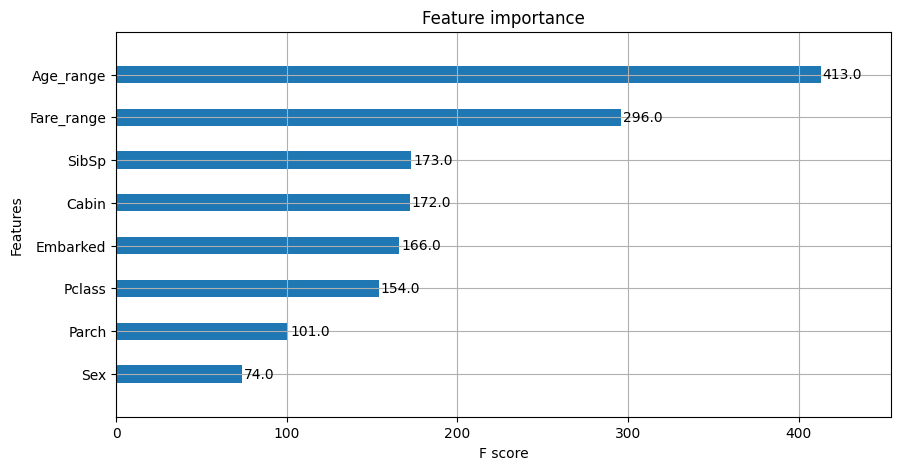

In [97]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10, 5))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

In [98]:
hyper_best_pred = xgb_clf.predict(X_test)
hyper_best_proba = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , hyper_best_pred, hyper_best_proba)

오차 행렬
[[105   5]
 [ 38  31]]
정확도: 0.7598, 정밀도: 0.8611, 재현율: 0.4493,    F1: 0.5905, AUC:0.8858
